In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({
    "text.usetex" : True,
    "font.family" : "serif",
    "font.serif" : "Computer Modern",
    "text.latex.preamble" : r'\usepackage{amsmath} \usepackage{mathtext} \usepackage[english, russian]{babel}'
})
plt.rcParams.update({
    "figure.figsize": (12, 7),
    'figure.dpi': 200
})

In [44]:
df = pd.read_csv("full_results.csv", index_col=0)
df.head()

,Unnamed: 0.14,Unnamed: 0.13,Unnamed: 0.12,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,...,1024,2048,11,22,45,90,181,362,724,1448
0,0,0,0,0,0,0,0,0,0,0,...,457872.0,772762.0,18.0,113.0,223.0,1346.0,11296.0,58732.0,67989.0,758259.0
1,1,1,1,1,1,1,1,1,1,1,...,466197.0,942369.0,20.0,63.0,1119.0,1599.0,6388.0,93551.0,110865.0,197105.0
2,2,2,2,2,2,2,2,2,2,2,...,899866.0,2357540.0,32.0,133.0,336.0,659.0,19531.0,44737.0,235453.0,743725.0
3,3,3,3,3,3,3,3,3,3,3,...,188337.0,583703.0,14.0,27.0,981.0,4504.0,3078.0,10298.0,129496.0,1339473.0
4,4,4,4,4,4,4,4,4,4,4,...,495395.0,1297413.0,10.0,147.0,438.0,3137.0,9860.0,16551.0,97902.0,419153.0


In [47]:
df.columns

Index(['8', '16', '32', '64', '128', '256', '512', '1024', '2048', '11', '22',
       '45', '90', '181', '362', '724', '1448'],
      dtype='object')

In [46]:
df = df.drop(columns=['Unnamed: 0.14', 'Unnamed: 0.13', 'Unnamed: 0.12', 'Unnamed: 0.11',
       'Unnamed: 0.10', 'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7',
       'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

In [48]:
df.to_csv("full_results.csv")

In [55]:
a = ['8', '16', '32', '64', '128', '256', '512', '1024', '2048', '11', '22',
       '45', '90', '181', '362', '724', '1448']
def comp(c):
    return int(c)
a.sort(key=comp)
a

['8',
 '11',
 '16',
 '22',
 '32',
 '45',
 '64',
 '90',
 '128',
 '181',
 '256',
 '362',
 '512',
 '724',
 '1024',
 '1448',
 '2048']

In [56]:
df = df[a]
df.head()

,8,11,16,22,32,45,64,90,128,181,256,362,512,724,1024,1448,2048
0,5.0,18.0,114.0,113.0,135.0,223.0,235.0,1346.0,1501.0,11296.0,24849.0,58732.0,26416.0,67989.0,457872.0,758259.0,772762.0
1,4.0,20.0,21.0,63.0,96.0,1119.0,1955.0,1599.0,13805.0,6388.0,12614.0,93551.0,43363.0,110865.0,466197.0,197105.0,942369.0
2,19.0,32.0,37.0,133.0,90.0,336.0,1465.0,659.0,2868.0,19531.0,8873.0,44737.0,14801.0,235453.0,899866.0,743725.0,2357540.0
3,18.0,14.0,24.0,27.0,759.0,981.0,1083.0,4504.0,4753.0,3078.0,7991.0,10298.0,75896.0,129496.0,188337.0,1339473.0,583703.0
4,9.0,10.0,38.0,147.0,71.0,438.0,1334.0,3137.0,1665.0,9860.0,67212.0,16551.0,32415.0,97902.0,495395.0,419153.0,1297413.0


<AxesSubplot:>

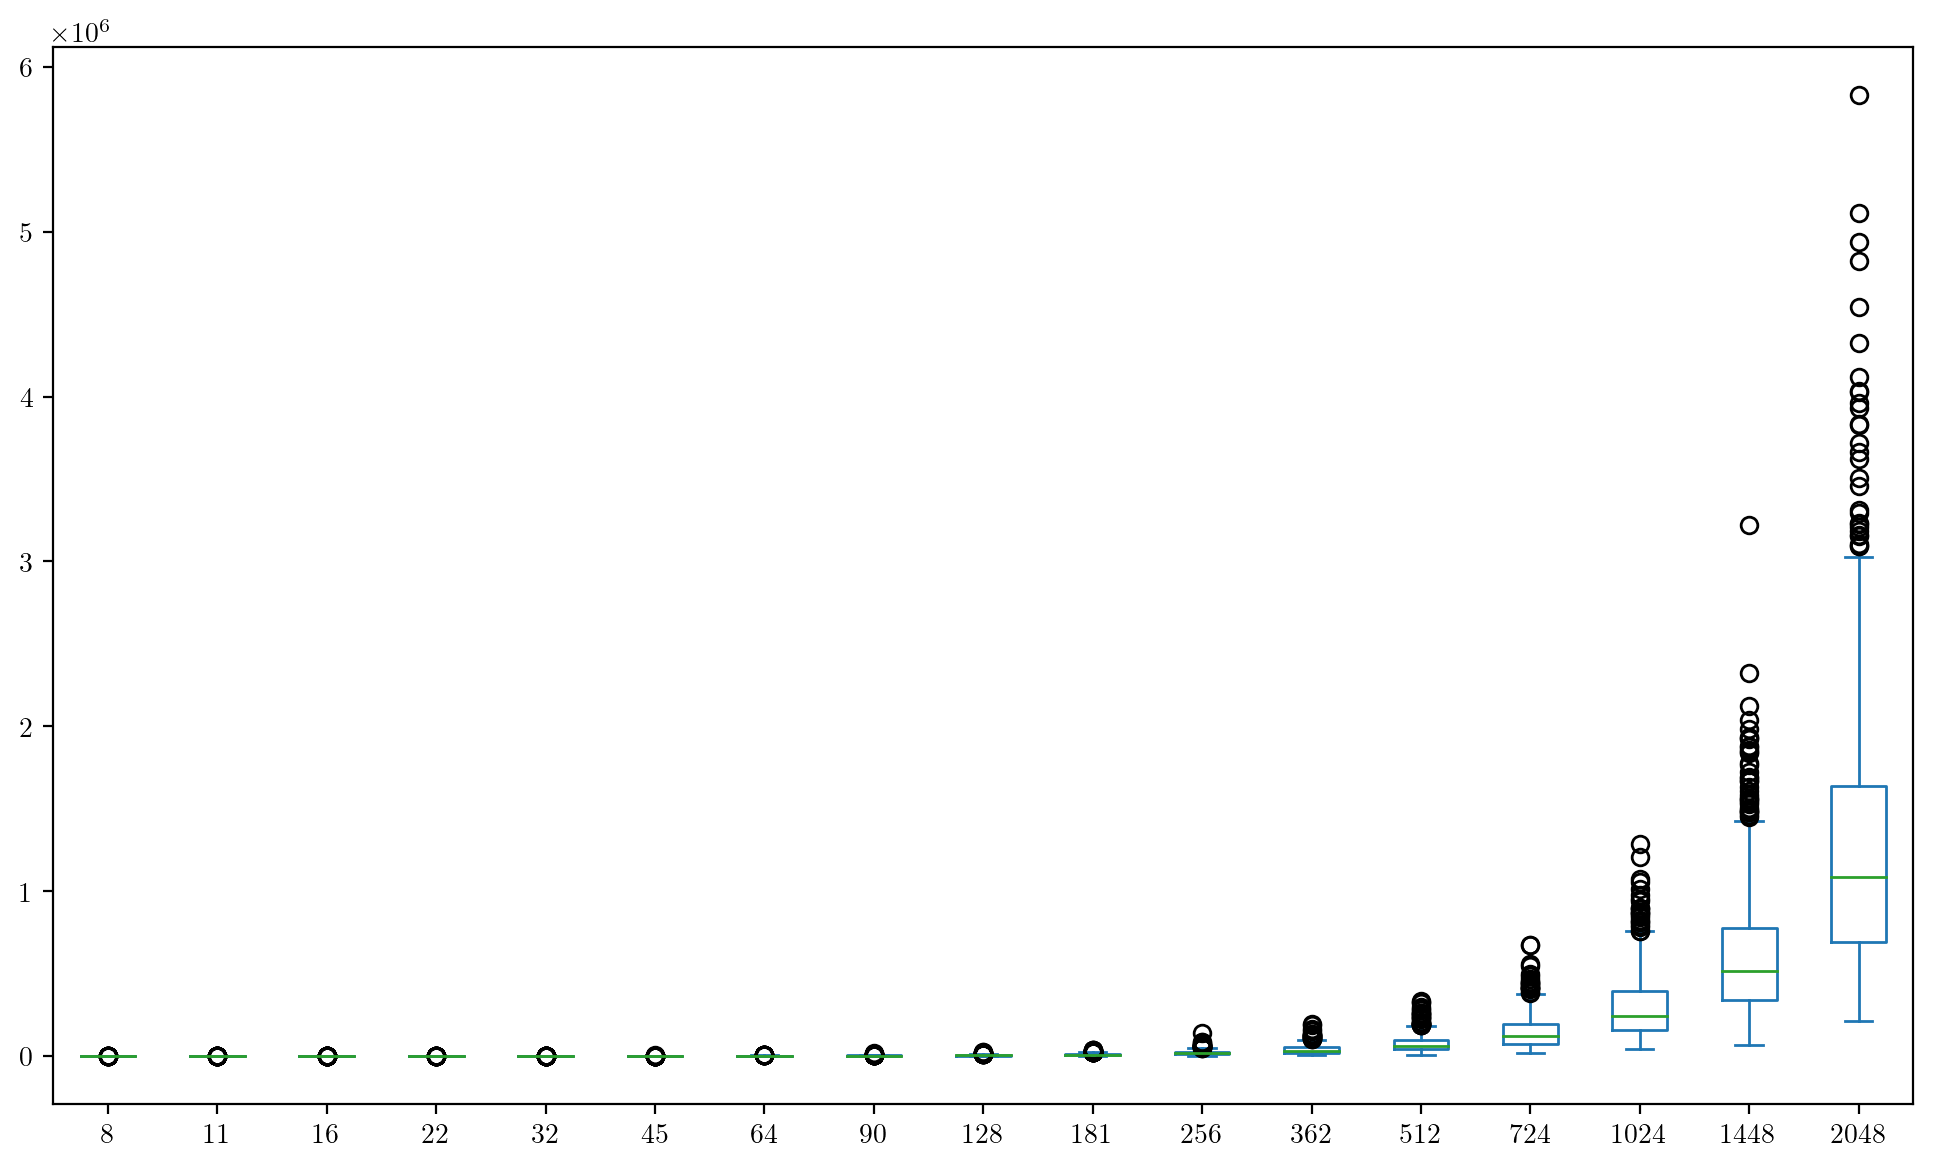

In [57]:
df.plot.box()

In [60]:
logdf = pd.DataFrame({col:np.log(df[col]) for col in df.columns})
logdf.head()

,8,11,16,22,32,45,64,90,128,181,256,362,512,724,1024,1448,2048
0,1.609438,2.890372,4.736198,4.727388,4.905275,5.407172,5.459586,7.204893,7.313887,9.332204,10.120573,10.980740,10.181725,11.127101,13.034345,13.538780,13.557726
1,1.386294,2.995732,3.044522,4.143135,4.564348,7.020191,7.578145,7.377134,9.532786,8.762177,9.442563,11.446262,10.677362,11.616069,13.052364,12.191492,13.756152
2,2.944439,3.465736,3.610918,4.890349,4.499810,5.817111,7.289611,6.490724,7.961370,9.879758,9.090768,10.708556,9.602450,12.369267,13.710001,13.519427,14.673129
3,2.890372,2.639057,3.178054,3.295837,6.632002,6.888572,6.987490,8.412721,8.466531,8.032035,8.986071,9.239705,11.237119,11.771405,12.145988,14.107787,13.277148
4,2.197225,2.302585,3.637586,4.990433,4.262680,6.082219,7.195937,8.051022,7.417580,9.196241,11.115607,9.714202,10.386377,11.491722,13.113111,12.945991,14.075883


Text(0.5, 1.0, '$ln(collapsing time)$($size$)')

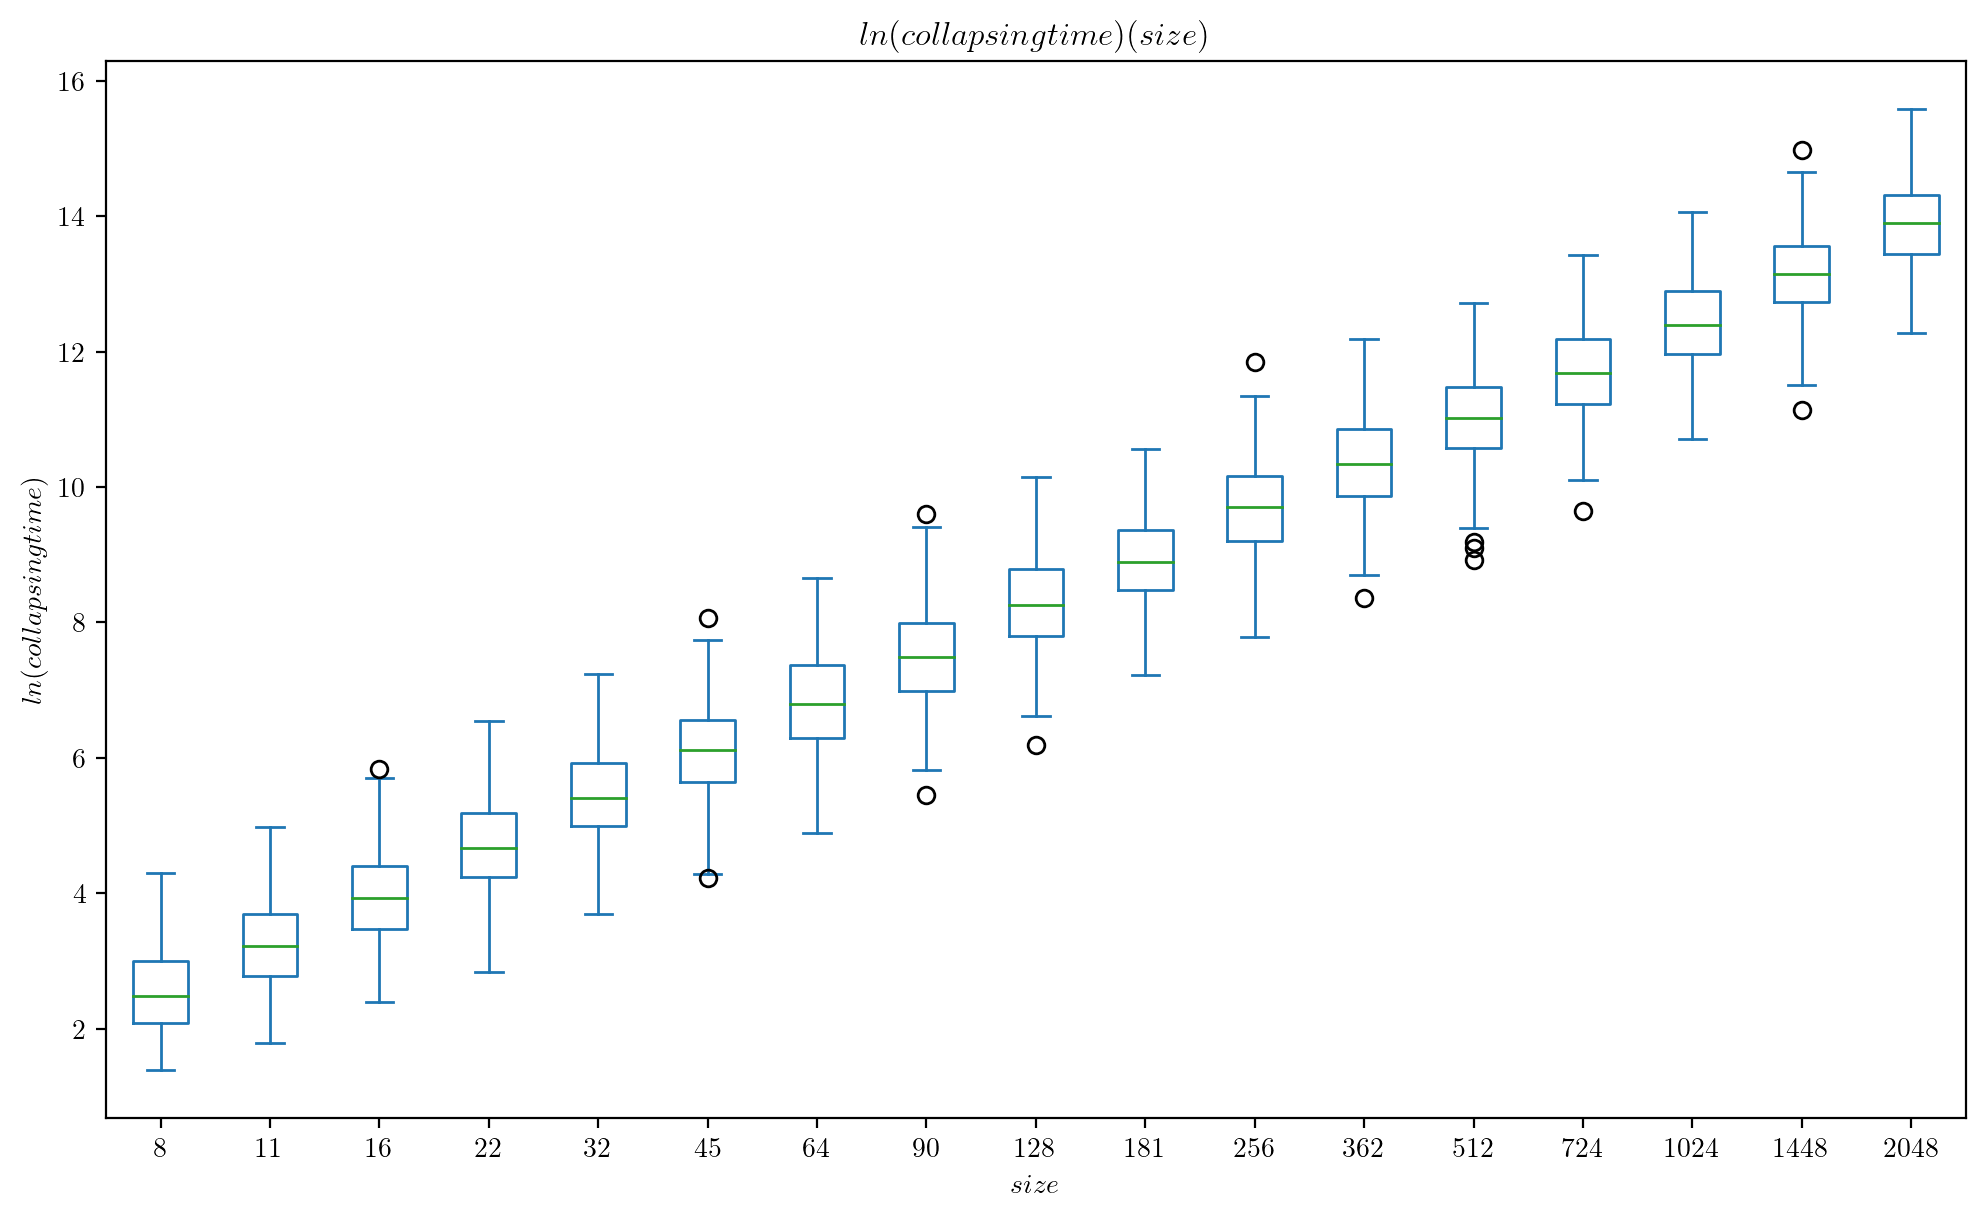

In [61]:
logdf.plot.box()
xname, xunit = r"$size$", ""
yname, yunit = r"$ln(collapsing time)$", "."

plt.xlabel(fr"{xname}")
plt.ylabel(fr"{yname}")
plt.title(fr"{yname}({xname})")

Видно, что зависимость степенная, так как график в логарифмическом масштабе линейный

In [62]:
x = []
y = []
yerr = []
for col in logdf.columns:
    series = logdf[col]
    x.append(np.log(float(col)))
    y.append(series.mean())
    yerr.append( np.sqrt((series**2).mean() - series.mean()**2)/len(series) )

In [34]:
# необходимые функции

def err_pres_formatter(value, error):
    """Rounds value and it's error according to scientific conventions"""
    first_digit = (np.array(error/10**np.floor(np.log10(error)), dtype="int"))
    first_digit_position = np.array(np.floor(np.log10(error)), dtype="int")
    ndigits = 1
    if first_digit == 1:
        ndigits += 1
    power = np.log10(abs(value))
    if abs(power//3) >= 1:
        power = 3*int(power//3)
        value /= 10**power
        error /= 10**power
        digit_number = -first_digit_position + ndigits+power-1
        if digit_number <= 0:
            return f"({round(int(value), digit_number)} \u00B1 {round(int(error), digit_number)})$\cdot 10^{{{power}}}$"
        return f"({round(value, digit_number)} \u00B1 {round(error, digit_number)})$\cdot 10^{{{power}}}$"
    digit_number = -first_digit_position + ndigits-1
    if digit_number <= 0:
        return f"{round(int(value), digit_number)} \u00B1 {round(int(error), digit_number)}"
    return f"{round(value, digit_number)} \u00B1 {round(error, digit_number)}"


def lower_upper_limits(domain, fun, popt, pcov, nsigma=1):
    '''Вычисляет минимальные и максимальные значения функции 
    при заданных парамерах и стандартных отклонениях
    в пределах nsigma*стандартное отклонение
    Возвращает:
    minA :(np.array) - массив минимальных значений
    maxA :(np.array) - массив максимальных значений'''
    err = np.sqrt(np.diag(pcov))
    corr = pcov /np.expand_dims(err, 1) / np.expand_dims(err, 0)
    deviations = np.eye(popt.size)*np.expand_dims(err, 1)  
    df = np.expand_dims(fun(domain, *popt), 1) - fun(np.expand_dims(domain, 1), *(np.expand_dims(popt, 1)+np.eye(popt.size)*np.expand_dims(err, 1)))
    dfmatrixes = np.expand_dims(df, 1)*np.expand_dims(df, 2) * np.expand_dims(corr, 0)
    sigm_f = np.sqrt(np.sum(dfmatrixes, axis=(1, 2)))
    return (fun(domain, *popt)-nsigma*sigm_f, fun(domain, *popt)+nsigma*sigm_f)

In [63]:
# параметры построения графика и аппроксмации
# пользовательские параметры. Переменные x, y, xerr, yerr дожны содержать данные
''' также необходимо изменить
название графика, 
название функции ,
набор параметров с размерностями через запятую '''
visApproxError = True   # рисовать ли область ошибки аппроксимации
hasErrors = True
# visApproxError*=hasErrors   # нельзя рисовать ошибки, если их нет)
par_names_str = r'''
k, .
'''
xname, xunit = r"$ln(size)$", ""
yname, yunit = r"$ln(collapsing time)$", "."
# function to approximate
fun_name = r"$f(x) = kx + b$"
def f(x, k, b):
    return b + k * x
# конец пользовательских параметров
from scipy.optimize import curve_fit
x = np.array(x)
y = np.array(y)

2.033166973411328 +- 0.0001847890688601874
-1.6428144103792688 +- 0.0009486510670601266


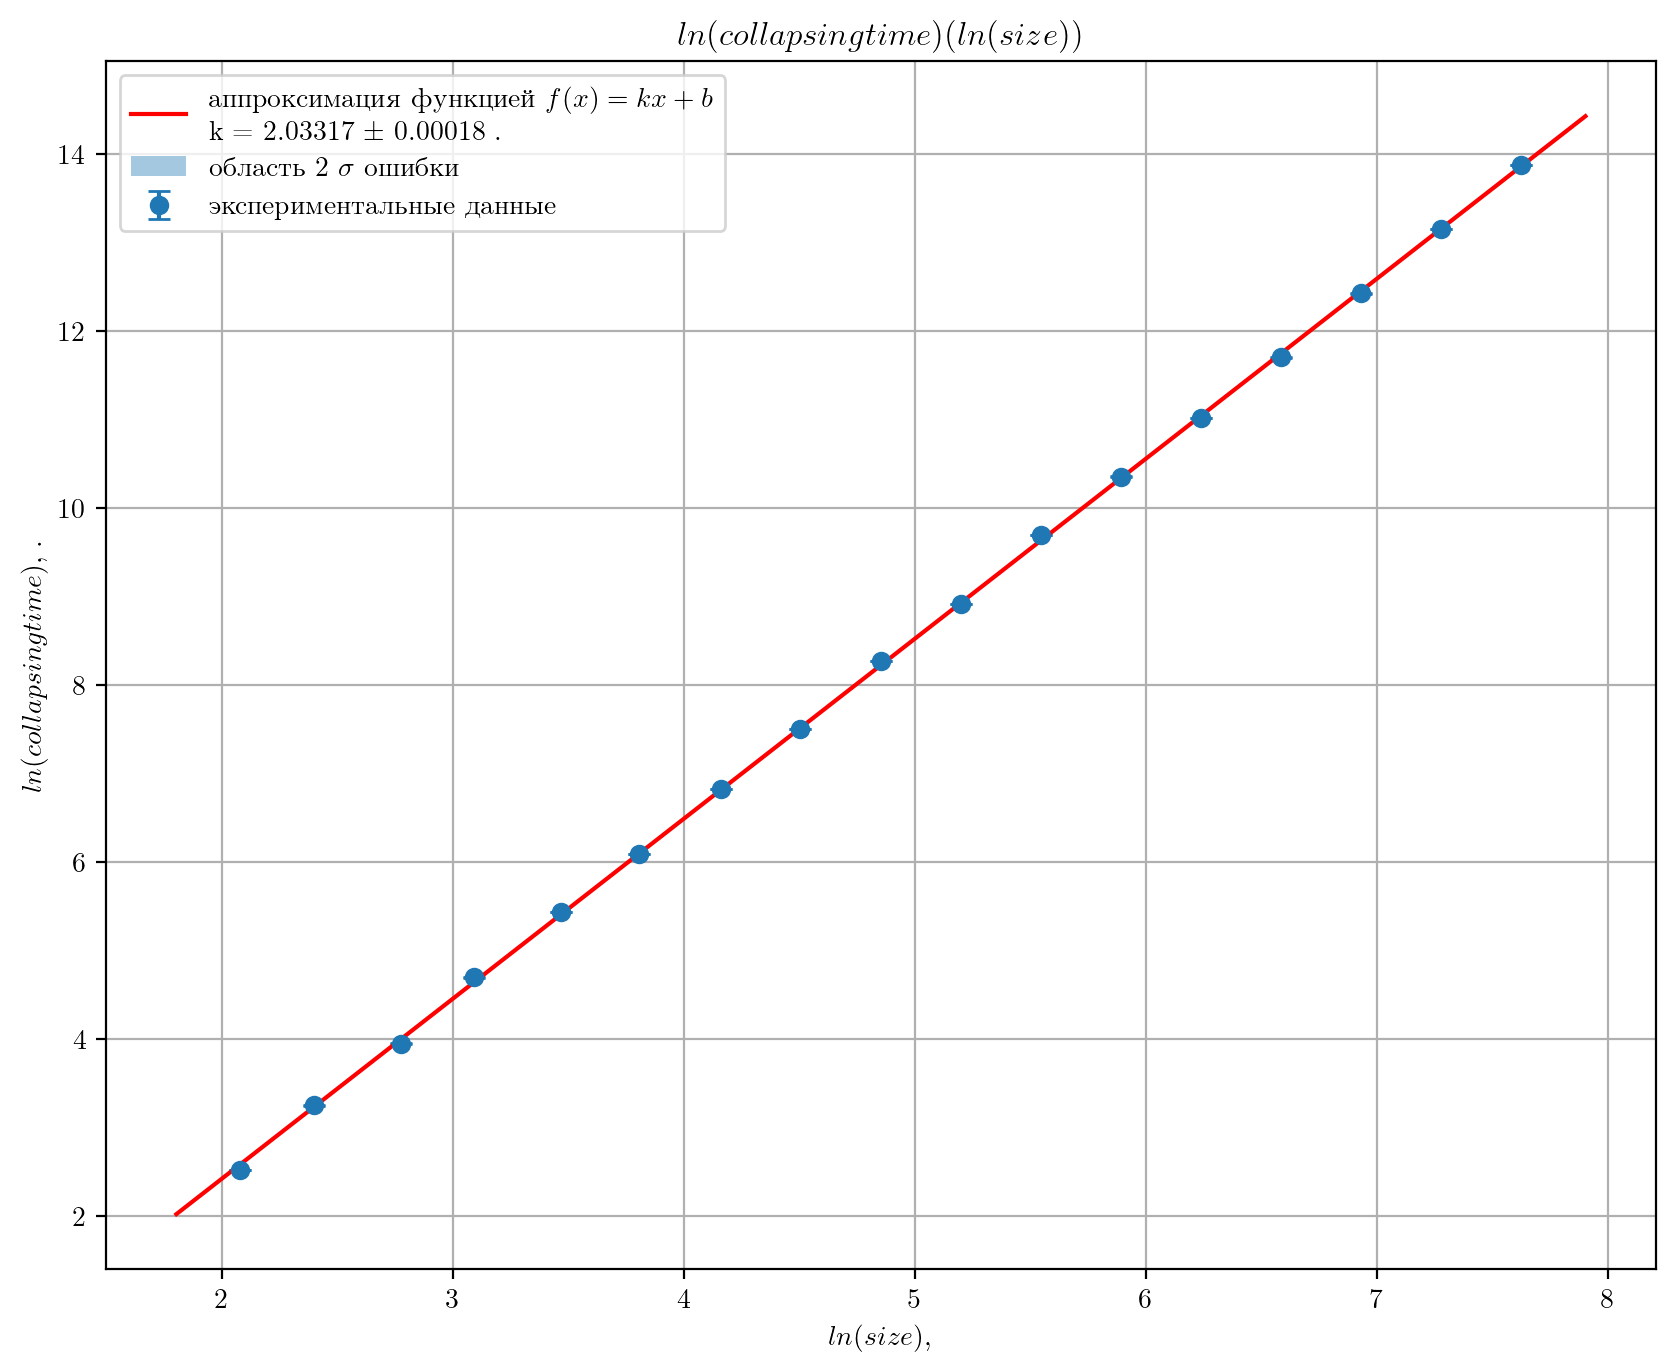

In [64]:

if hasErrors:
    popt, pcov = curve_fit(f, x, y, sigma=yerr, absolute_sigma=True)
else:
    popt, pcov = curve_fit(f, x, y)

err = np.sqrt(np.diag(pcov))
for v, er in zip(popt, err):
    print(v,'+-',er)

approx_label = f"аппроксимация функцией {fun_name}"
par_names = [x.split(', ') for x in par_names_str.strip().split("\n")]
for i in range(len(par_names)):
    name, units = par_names[i]
    approx_label += f"\n{name} = {err_pres_formatter(popt[i], err[i])} {units}"
    

plt.figure(figsize=(10, 8))
if hasErrors:
    plt.errorbar(x, y, fmt="o", xerr=None, yerr=yerr, label="экспериментальные данные", capsize=4, ms=6)
else:
    plt.plot(x, y, "o", label="экспериментальные данные")
teorPoints = 50     
intent = 0.05   # отступ по бокам от обласи экспериментальных данных
a, b = x.min(), x.max()
X = np.linspace(a-(b-a)*intent, b+(b-a)*intent, num=teorPoints)
plt.plot(X, f(X, *popt), 'r', label=approx_label)
if visApproxError:
    nsigma = 2
    minA, maxA = lower_upper_limits(X, f, popt, pcov, nsigma=nsigma)
    plt.fill_between(X, minA, maxA, alpha=0.4, label=f"область {nsigma} $\sigma$ ошибки")

plt.grid(True)
plt.xlabel(fr"{xname}, {xunit}")
plt.ylabel(fr"{yname}, {yunit}")
plt.title(fr"{yname}({xname})")
plt.legend()

# if not os.path.exists(impath):
#     os.makedirs(impath)
# plt.savefig(os.path.join(impath, f"templ{imNum}.png"), dpi=300)
# imNum+=1

# plt.savefig(os.path.join(impath, f"templ.png"), dpi=300)

In [65]:
np.exp(-1.6428144103792688)

0.19343487037510113

In [68]:
df['1448']

0       758259.0
1       197105.0
2       743725.0
3      1339473.0
4       419153.0
         ...    
495     655901.0
496     396657.0
497     949296.0
498     473432.0
499     331680.0
Name: 1448, Length: 500, dtype: float64